/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_80979/3118383447.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_cropped_scatter = df_bins_scatter.groupby('lead_time_bin')['adr'].mean().reset_index()


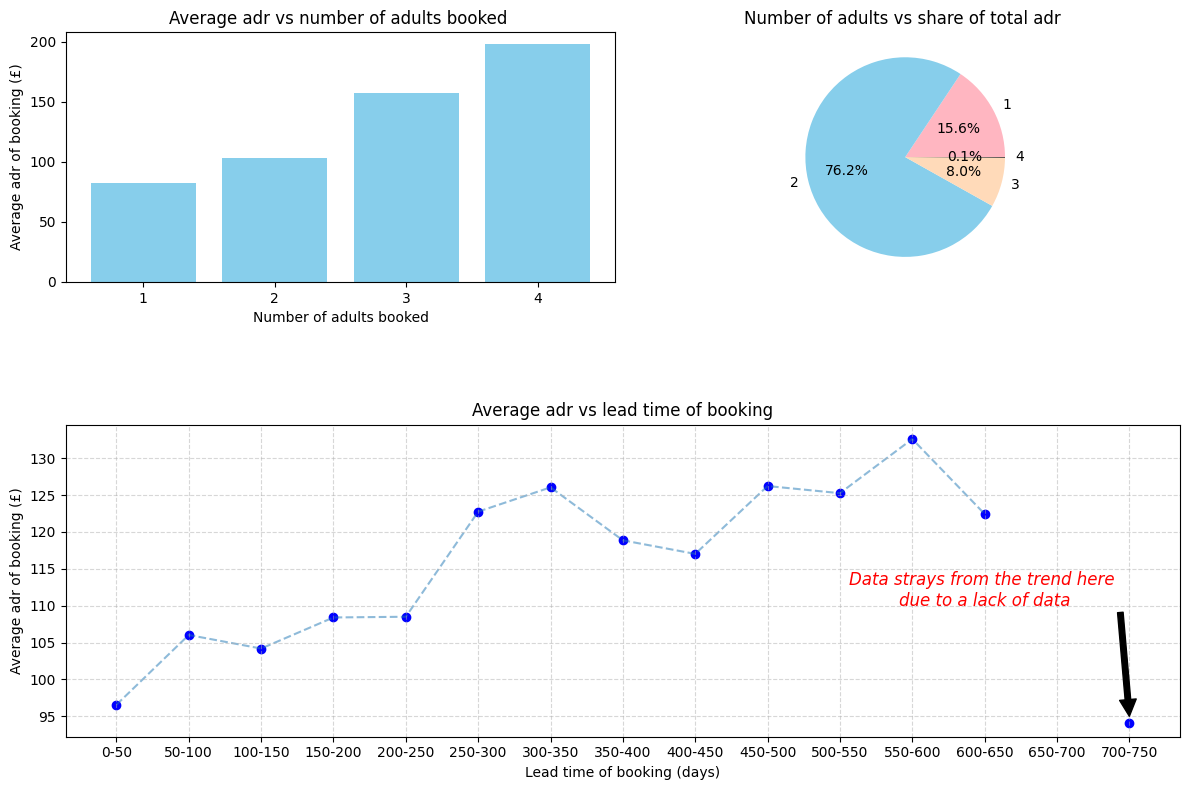

In [1]:
#Importing the required libaries
import matplotlib.pyplot as plt
import pandas as pd 

# Processing the data first 
#Importing the file and converting to a pandas data frame

df = pd.read_csv('hotel_bookings.csv')

# Groupig the relevent data for ploting 

df_cropped_bar = df.groupby('adults')['adr'].mean().reset_index()
df_cropped_pie = df.groupby('adults')['adr'].sum().reset_index()
df_cropped_scatter = df.groupby('lead_time')['adr'].mean().reset_index()

# croping the data to only valid points 
df_cropped_bar = df_cropped_bar[(df_cropped_bar['adults'] > 0) & (df_cropped_bar['adults'] < 5)]
df_cropped_pie = df_cropped_pie[(df_cropped_pie['adults'] > 0) & (df_cropped_bar['adults'] < 5)]

# Finiding the average adr per person 
df_cropped_bar['adr_pp'] = df_cropped_bar['adr'] / df_cropped_bar['adults'].replace(0, 1) # ensuring no diving by 0

# The scatter plot requires more challangng sta cleaning 
df_bins_scatter = df[['adr', 'lead_time']].copy() # We have to copt to avoid a Setting with copy warning

# Put the lead time into bins of 20 days
bin_size = 50
max_lead_time = df_cropped_scatter['lead_time'].max()
bins = range(0, int(max_lead_time) + bin_size, bin_size)  # e.g., [0,10,20,...,max_lead_time]

# Create bins and compute average cancellation rate per bin
df_bins_scatter['lead_time_bin'] = pd.cut(df_cropped_scatter['lead_time'], bins=bins, right=False)  # right=False means [a, b)
df_cropped_scatter = df_bins_scatter.groupby('lead_time_bin')['adr'].mean().reset_index()

# Extract data for plotting
bin_labels = [f"{int(b.left)}-{int(b.right)}" for b in df_cropped_scatter['lead_time_bin']]
cancellation_rates = df_cropped_scatter['adr']

# Creating custom subplots to have a row of 2 then a single plot along the bottom

# Creating a 2x2 grid 
fig, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 1.5]})

# Top Row with two plots
ax1 = axs[0, 0]  # Top-left
ax2 = axs[0, 1]  # Top-right


# Bottom Row one wide plot
ax3 = fig.add_subplot(2, 1, 2)  # Span bottom row
axs[1, 0].remove()  # Remove unused subplot
axs[1, 1].remove()  # Remove unused subplot 

# Plotting the bar graph
ax1.bar(df_cropped_bar['adults'],df_cropped_bar['adr'],zorder=2, color = 'skyblue');
ax1.set_title('Average adr vs number of adults booked ')
ax1.set_xlim()
ax1.set_xticks(df_cropped_bar['adults'])
ax1.set_xticklabels(df_cropped_bar['adults'])
ax1.set_xlabel('Number of adults booked')
ax1.set_ylabel('Average adr of booking (£)')

# Plotting the pie chart
ax2.pie(df_cropped_pie['adr'],labels=df_cropped_pie.index,
        colors = ['lightpink','skyblue','peachpuff','Black'],
        autopct='%.1f%%'
       );
ax2.set_title('Number of adults vs share of total adr ')


# Plotting the scatter plot
ax3.scatter(bin_labels, cancellation_rates, color='blue')
ax3.plot(bin_labels, cancellation_rates, linestyle='--', alpha=0.5, zorder=1)  # Add a trend line
ax3.grid(True, zorder=0, linestyle='--', alpha=0.5)
ax3.set_title('Average adr vs lead time of booking')
ax3.set_xlabel('Lead time of booking (days)')
ax3.set_ylabel('Average adr of booking (£)')
ax3.annotate('Data strays from the trend here \ndue to a lack of data', xy=(14, 95), xytext=(12, 110),
            fontsize=12, style='italic', color='red', ha='center',
            arrowprops=dict(facecolor='black'),zorder=20);


plt.tight_layout()
plt.show()

**Question:** 
How do the number of adults booked and lead time affect adr:\n

**Relevance:**
Understanding booking patterns helps hotels to optimize pricing. Understanding the relationships and trends between booking behaviour and ADR the hotel can adjust pricing to maximise profit.

**Data Justification:**
I chose to analyse the lead time and the number of adults booked as these factors have a strong impact on room selection and price. As shown in the bar chart above larger groups often booker higher-value rooms, and early bookings may prefer to book the more premium rooms due to higher demand.

**Findings and Insights:**
The bar chart indicates that the number of adults increases so does the average ADR of their booking, suggesting larger groups book the more expensive rooms. 

The pie chart shows the most common booking is two adults, the hotel can take advantage of this strong demand by increasing the prices of these rooms.  

Adr also increases with lead lead time indicaring that a booking for a premium room requires and ealry booking because of high demand. 

To maximise profits the hotel should use pricing that incentivises early bookings and bookings of couples or individuals. The optimal lead time is approximately 500-600 days before the booking to ensure maximum revenue.

Overall mark: 72

#### Business Question:
A relevant business question is clearly identified and is well connected to the gien dataset. The importance of answering the question is also explained. Comprehensive evidences are presented to derive the findings and implications, which are insightful.

<u>Very Good</u>

#### Data:
Two key variables, the lead time and the number of adults booked, are effectively used to answer the proposed question. The rationale supporting the variable selection is addressed. Appropriate data grouping, data filtering are applied, together with the effective variable transformation to create 'adr_pp', showing good skill of data manipulation. Improvements could include employing more variables to make the analysis more comprehensive.

<u>Very Good</u>

#### Visualization:
Multiple plots are presented for the visualization purpose, which includes bar chart, pie chart and dotted line plot. The plots are clear and informative in visualization, which also well support the findings and implications provided. The plots come with essential elements of titles, axis labels, and ticks. Necessary annotation is also provided. However, it would be better if the numbers outside of the pie in the pie chart are explained.

<u>Excellent</u>

#### Code:
The code structure is clear and easy to follow, with no errors to run. Comments are available along with the code. However, the readability could be improved if the code is separated into difference cells according to functionality, when using Jupyter Notebook.

<u>Very Good</u>